In [1]:
# Data Analysis and Wrangling  
import numpy as np 
import pandas as pd 
import glob

# Visualization 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 


In [2]:
path1 = "/Users/prashant/Downloads/Student-Placement-Guidance/Exploratory Data Analysis /2015/Sem-3_2015/Sem3Dec12.xlsx"
path2 = "/Users/prashant/Downloads/Student-Placement-Guidance/Exploratory Data Analysis /2015/Sem-3_2015/2015.xlsx"

In [3]:
sem_3_2015_og_df = pd.read_excel(path1)
results = pd.read_excel(path2)
results.head()

,NAME,Company
0,AMRE PRITAM,Vistaar
1,ASRANI BHARTI LACHMAN,Tech Mahindra
2,BAGWE KARAN VINAY,Infosys
3,BANDIVADEKAR RUTALI DILIP,Infosys
4,BELWALKAR MANALI C,Bista Solutions


In [4]:
sem_3_2015_og_df.index = sem_3_2015_og_df['Seat Number']
sem_3_2015_og_df.head()

,Seat Number,NAME,AM-III-TH,AM-III-TW,EDLC-TH,EDLC-TW,EDLC-P,DSGT-TH,DSGT-TW,DCDA-TH,DLDA-TW,DSH-TH,DSF-TW,DSF-P,COA-TH,COA-TW,PCT-TW,Total,Remarks
Seat Number,,,,,,,,,,,,,,,,,,,
223201,223201,AMIN RISHITA VIJAYKUMAR,20,17,42,23,18,44,19,40,20,40,21,20,33,13,41,411,FAIL
223202,223202,AMRE PRITAM ANILKUMAR,40,23,70,20,19,76,23,58,21,63,22,22,41,24,44,566,PASS
223203,223203,ANSAN SUNNY SALAMA,40,17,40,20,17,44,18,20,20,19,19,15,28,19,40,376,FAIL
223204,223204,ASRANI BHARTI LACHMAN,41,23,71,23,18,62,20,55,20,49,20,20,52,14,41,529,PASS
223205,223205,BADE AMIT KERAMBA,14,15,53,20,19,40,18,45,21,40,14,16,45,21,40,421,FAIL


In [5]:
# Removing all unecessary columns 
sem_3_2015_df = sem_3_2015_og_df.drop(sem_3_2015_og_df.iloc[:, 2:17], axis=1)
sem_3_2015_df.head()

,Seat Number,NAME,Total,Remarks
Seat Number,,,,
223201,223201,AMIN RISHITA VIJAYKUMAR,411,FAIL
223202,223202,AMRE PRITAM ANILKUMAR,566,PASS
223203,223203,ANSAN SUNNY SALAMA,376,FAIL
223204,223204,ASRANI BHARTI LACHMAN,529,PASS
223205,223205,BADE AMIT KERAMBA,421,FAIL


In [6]:
# Merge two excel sheets with NAME as a common column
sem_3_2015_merge = pd.merge(sem_3_2015_df, results, how='left')
sem_3_2015_merge.head(10)

,Seat Number,NAME,Total,Remarks,Company
0,223201,AMIN RISHITA VIJAYKUMAR,411,FAIL,NaN
1,223202,AMRE PRITAM ANILKUMAR,566,PASS,NaN
2,223203,ANSAN SUNNY SALAMA,376,FAIL,NaN
3,223204,ASRANI BHARTI LACHMAN,529,PASS,Tech Mahindra
4,223205,BADE AMIT KERAMBA,421,FAIL,NaN
5,223206,BAGWE KARAN VINAY,553,PASS,Infosys
6,223207,BANDIVADEKAR RUTALI DILIP,616,PASS,Infosys
7,223208,BARBHAYA RISHI DIVYESH,412,FAIL,NaN
8,223209,BELWALKAR MANALI CHANDRAKANT,500,PASS,NaN
9,223210,BHAGAT DOLLY DEEPAK,489,FAIL,NaN


In [7]:
# Replacing placement with binary values 

sem_3_2015_merge['Company'].loc[~sem_3_2015_merge['Company'].isnull()] = 1
sem_3_2015_merge['Company'].loc[sem_3_2015_merge['Company'].isnull()] = 0

sem_3_2015_merge.head()

/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:187: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,Seat Number,NAME,Total,Remarks,Company
0,223201,AMIN RISHITA VIJAYKUMAR,411,FAIL,0
1,223202,AMRE PRITAM ANILKUMAR,566,PASS,0
2,223203,ANSAN SUNNY SALAMA,376,FAIL,0
3,223204,ASRANI BHARTI LACHMAN,529,PASS,1
4,223205,BADE AMIT KERAMBA,421,FAIL,0


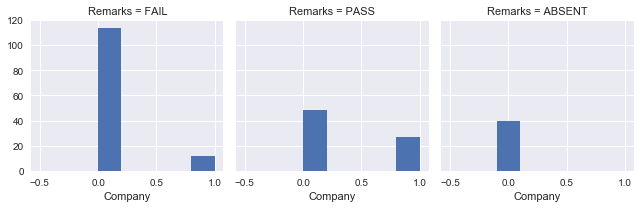

In [8]:
g = sns.FacetGrid(sem_3_2015_merge, col='Remarks')
g.map(plt.hist, 'Company', bins=5)

A simple histogram which correlates Remarks with placement of a student. From the graph we can conclude that **unplaced student contains high percentage of FAIL students**. This validates our assumption that failing of a student in certain exam has direct impact on his placement. 

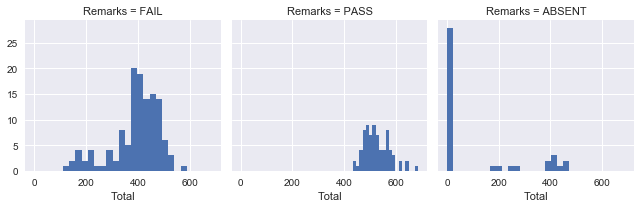

In [9]:
g = sns.FacetGrid(sem_3_2015_merge, col='Remarks')
g.map(plt.hist, 'Total', bins = 20)

A histogram compairing Total marks with Remarks which shows there is discrepancy in the data. Because the passing student and failing student range coincide with each other. Hence, **total marks cannot be a good parameter for training our model**

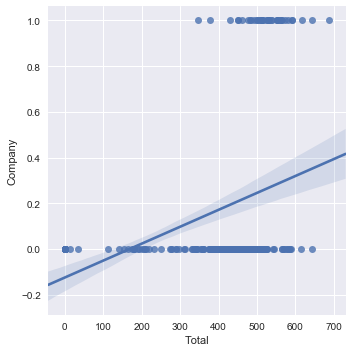

In [10]:
#for dataset in sem_3_2015_merge:
    #dataset['Remarks'] = dataset['Remarks'].map({'FAIL':0, 'PASS':1, 'ABSENT':2}).astype(int)

sns.lmplot(y='Company', x='Total', data=sem_3_2015_merge)

Another plot which proves our earlier hypothesis as true. This graph proves there is no concerete correlation between total marks and placement of a student. 

# Analysing original dataframe for Correlation between subjects and placements



In [11]:
sem_3_2015_og_df

,Seat Number,NAME,AM-III-TH,AM-III-TW,EDLC-TH,EDLC-TW,EDLC-P,DSGT-TH,DSGT-TW,DCDA-TH,DLDA-TW,DSH-TH,DSF-TW,DSF-P,COA-TH,COA-TW,PCT-TW,Total,Remarks
Seat Number,,,,,,,,,,,,,,,,,,,
223201,223201,AMIN RISHITA VIJAYKUMAR,20,17,42,23,18,44,19,40,20,40,21,20,33,13,41,411,FAIL
223202,223202,AMRE PRITAM ANILKUMAR,40,23,70,20,19,76,23,58,21,63,22,22,41,24,44,566,PASS
223203,223203,ANSAN SUNNY SALAMA,40,17,40,20,17,44,18,20,20,19,19,15,28,19,40,376,FAIL
223204,223204,ASRANI BHARTI LACHMAN,41,23,71,23,18,62,20,55,20,49,20,20,52,14,41,529,PASS
223205,223205,BADE AMIT KERAMBA,14,15,53,20,19,40,18,45,21,40,14,16,45,21,40,421,FAIL
223206,223206,BAGWE KARAN VINAY,48,20,76,18,18,78,17,56,18,62,16,17,48,22,39,553,PASS
223207,223207,BANDIVADEKAR RUTALI DILIP,69,21,83,23,18,85,23,70,23,57,23,23,41,18,39,616,PASS
223208,223208,BARBHAYA RISHI DIVYESH,10,15,49,21,19,56,16,52,20,23,15,17,44,19,36,412,FAIL
223209,223209,BELWALKAR MANALI CHANDRAKANT,45,21,50,19,19,52,17,68,23,47,20,20,36,21,42,500,PASS


Creating a new dataframe with company name merged with the original data

In [12]:
sem_3_2015_og_df_merge = pd.merge(sem_3_2015_og_df, results, how='left')
sem_3_2015_og_df_merge['Company'].loc[~sem_3_2015_og_df_merge['Company'].isnull()] = 1
sem_3_2015_og_df_merge['Company'].loc[sem_3_2015_og_df_merge['Company'].isnull()] = 0
sem_3_2015_og_df_merge.head()

,Seat Number,NAME,AM-III-TH,AM-III-TW,EDLC-TH,EDLC-TW,EDLC-P,DSGT-TH,DSGT-TW,DCDA-TH,DLDA-TW,DSH-TH,DSF-TW,DSF-P,COA-TH,COA-TW,PCT-TW,Total,Remarks,Company
0,223201,AMIN RISHITA VIJAYKUMAR,20,17,42,23,18,44,19,40,20,40,21,20,33,13,41,411,FAIL,0
1,223202,AMRE PRITAM ANILKUMAR,40,23,70,20,19,76,23,58,21,63,22,22,41,24,44,566,PASS,0
2,223203,ANSAN SUNNY SALAMA,40,17,40,20,17,44,18,20,20,19,19,15,28,19,40,376,FAIL,0
3,223204,ASRANI BHARTI LACHMAN,41,23,71,23,18,62,20,55,20,49,20,20,52,14,41,529,PASS,1
4,223205,BADE AMIT KERAMBA,14,15,53,20,19,40,18,45,21,40,14,16,45,21,40,421,FAIL,0


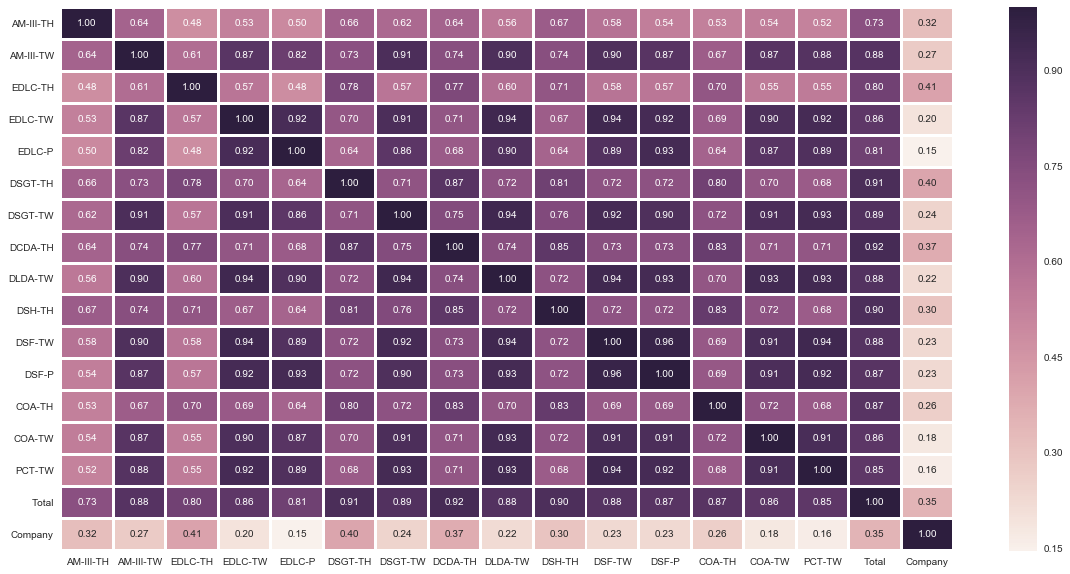

In [13]:
corr = sem_3_2015_og_df_merge.corr()
plt.figure(figsize=(20,10)) #To adjust the size of graph
sns.heatmap(corr, linewidths=2, fmt=".2f", annot=True) #Use to show values in the boxes

In [14]:
sem_3_2015_og_df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 242
Data columns (total 20 columns):
Seat Number    243 non-null object
NAME           243 non-null object
AM-III-TH      243 non-null int64
AM-III-TW      243 non-null int64
EDLC-TH        243 non-null int64
EDLC-TW        243 non-null int64
EDLC-P         243 non-null int64
DSGT-TH        243 non-null int64
DSGT-TW        243 non-null int64
DCDA-TH        243 non-null int64
DLDA-TW        243 non-null int64
DSH-TH         243 non-null int64
DSF-TW         243 non-null int64
DSF-P          243 non-null int64
COA-TH         243 non-null int64
COA-TW         243 non-null int64
PCT-TW         243 non-null int64
Total          243 non-null int64
Remarks        241 non-null object
Company        243 non-null int64
dtypes: int64(17), object(3)
memory usage: 39.9+ KB


In [15]:
#sns.pairplot(sem_3_2015_og_df_merge, hue='Company', size =5);

The last row shows Company vs Subject graph. Any alternative method can be used to get the same information. 

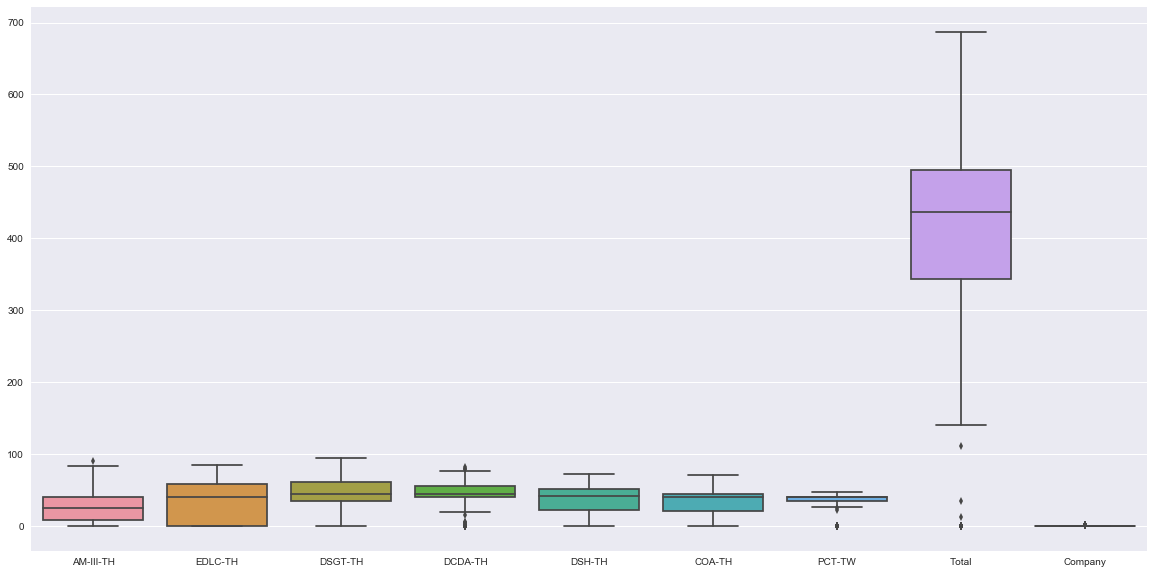

In [21]:
# Boxplot
plt.figure(figsize=(20,10))
stats_df = sem_3_2015_og_df_merge.drop(['AM-III-TW', 'EDLC-TW','EDLC-P','DSGT-TW','DLDA-TW','DSF-TW','DSF-P','COA-TW'], axis=1)
sns.boxplot(data=stats_df)